In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail = pd.read_excel("Online Retail.xlsx")

In [3]:
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
# shape of df
retail.shape

(541909, 8)

In [5]:
# df info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data Cleaning

In [6]:
# calculating the missing values % in df
df_null = round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# Droping rows having null values
retail = retail.dropna()
retail.shape

(406829, 8)

In [8]:
# changing the datatype of customerID
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [9]:
# New Attribute: Monetory
retail['Amount'] = retail['Quantity']*retail['UnitPrice']

In [10]:
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# New Attribute: Frequency
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [12]:
# Merging the two dfs
rfm = pd.merge(rfm_m,rfm_f, on = 'CustomerID', how = 'inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [13]:
# New Attribute: Recency
# Convert to datetime to proper datatype
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [14]:
# compute the maximum date to know the last trasaction date
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [38]:
# Compute the difference between max date and transaction date
retail['Recency'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,373 days 04:24:00


In [39]:
# Compute recency of customer
rfm_p = retail.groupby('CustomerID')['Recency'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [40]:
# Extract number of days only
rfm_p['Recency'] = rfm_p['Recency'].dt.days
rfm_p.head()



,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [41]:
# Merge the dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm_columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Diff,Recency
0,12346.0,0.00,2,325,325
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,74
3,12349.0,1757.55,73,18,18
4,12350.0,334.40,17,309,309


Text(0.5, 0, 'Attributes')

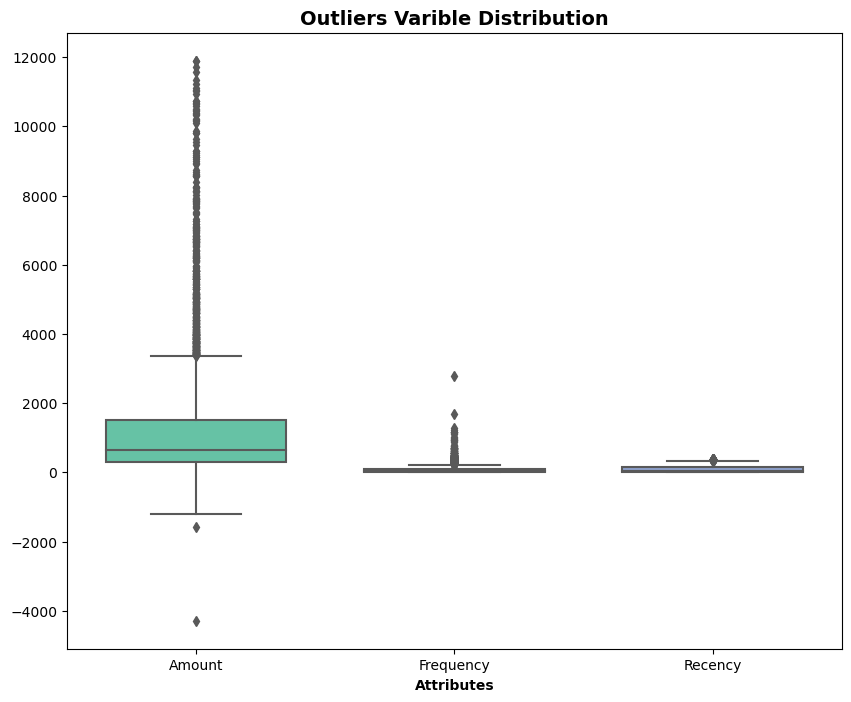

In [42]:
# Outliers analysis of Amount, Frequency and Recency
attributes = ['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=rfm[attributes],orient="v",palette="Set2",whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Varible Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')

In [43]:
# Removing Outlier for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >=Q1-1.5*IQR)&(rfm.Amount<=Q3+1.5*IQR)]

# Removing Outlier for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >=Q1-1.5*IQR)&(rfm.Recency<=Q3+1.5*IQR)]

# Removing Outlier for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >=Q1-1.5*IQR)&(rfm.Frequency<=Q3+1.5*IQR)]

In [44]:
# Scaling the features
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]


In [45]:
# Instantiate
scaler = StandardScaler()


In [46]:
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)

In [48]:
# rfm_df_scaled
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.760586,-0.758756,2.297238
1,1.909118,1.076326,-0.909003
2,0.352662,-0.463104,-0.186609
3,0.328077,-0.034918,-0.740774
4,-0.553452,-0.605833,2.138905


In [50]:
# Model Building
# k means with some arbitraty r
kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(rfm_df_scaled)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

AttributeError: 'KMeans' object has no attribute 'labels'

In [51]:
set(kmeans.labels_)
set(kmeans.labels_)

{0, 1, 2, 3}

# Elbow curve to get the right number of clusters

In [53]:
ssd = []

In [54]:
range_n_clusters = [2,3,4,5,6,7,8]

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

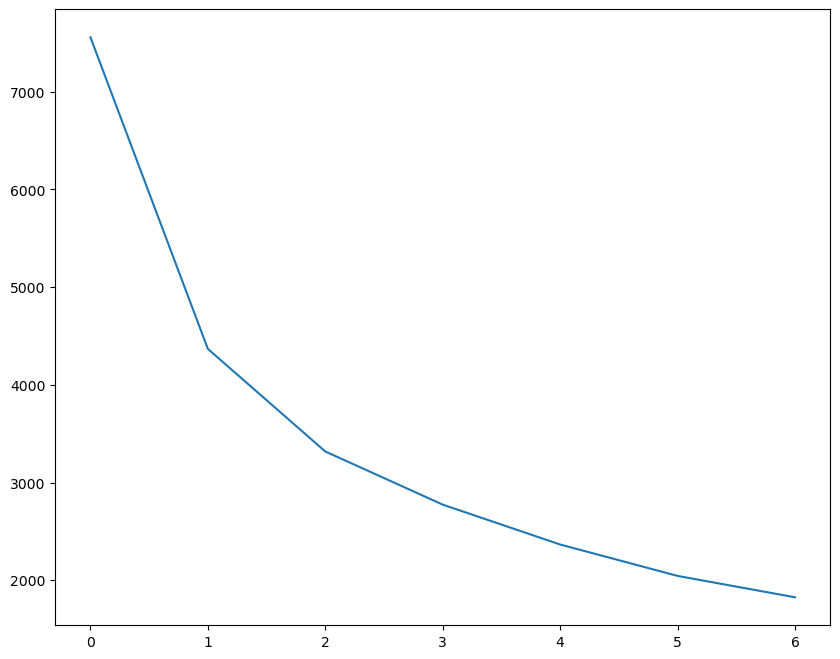

In [55]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters 
plt.plot(ssd)

In [56]:
# Final model with k = 3
kmeans = KMeans(n_clusters=3,max_iter=300)
kmeans.fit(rfm_df_scaled)
kmeans.labels_
kmeans.predict(rfm_df_scaled)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 0, ..., 2, 0, 0])

In [58]:
# assign the label
rfm['clusterID'] = kmeans.predict(rfm_df_scaled)
rfm.head()

,CustomerID,Amount,Frequency,Diff,Recency,clusterID
0,12346.0,0.00,2,325,325,2
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,74,0
3,12349.0,1757.55,73,18,18,0
4,12350.0,334.40,17,309,309,2


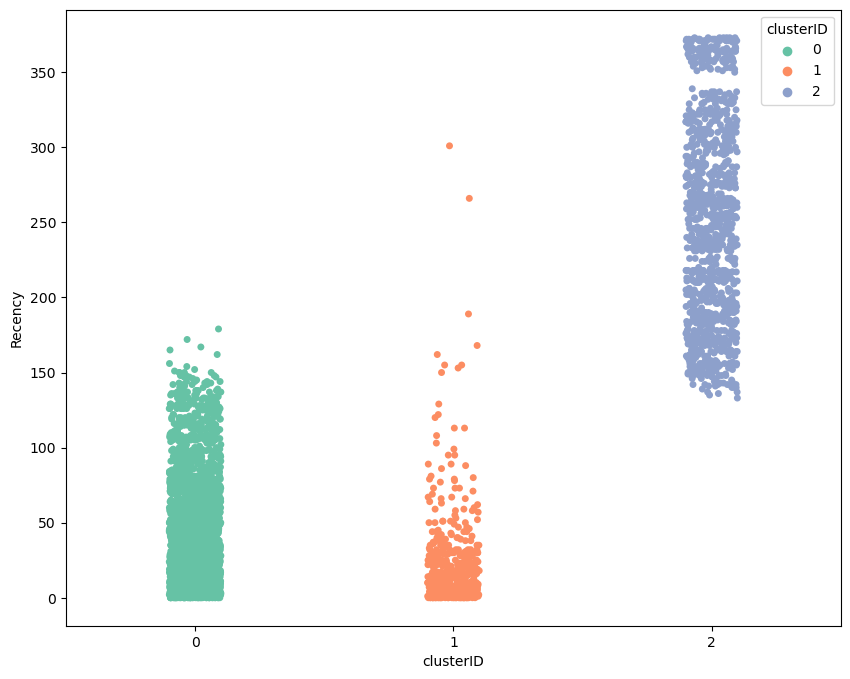

In [67]:
# Box plot to visualize clusterID Vs Recency
import matplotlib.pyplot as plt
sns.stripplot(x = 'clusterID', y = 'Recency', hue="clusterID", palette="Set2", data=rfm)
plt.savefig("Cluster_IDRecency.png")

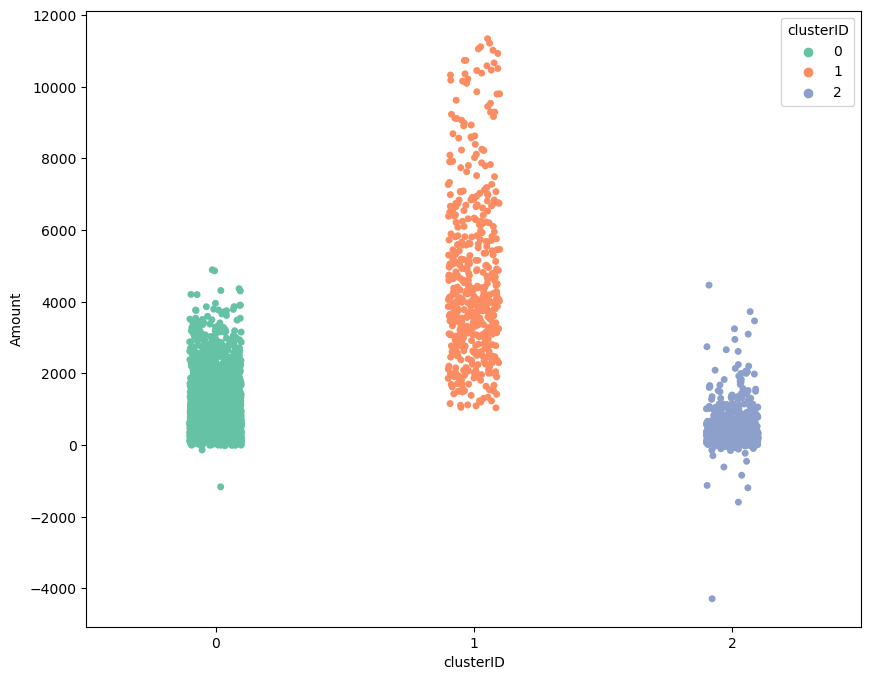

In [68]:
sns.stripplot(x = 'clusterID', y = 'Amount', hue="clusterID", palette = "Set2", data=rfm)
plt.savefig("Cluster_IDAmount.png")

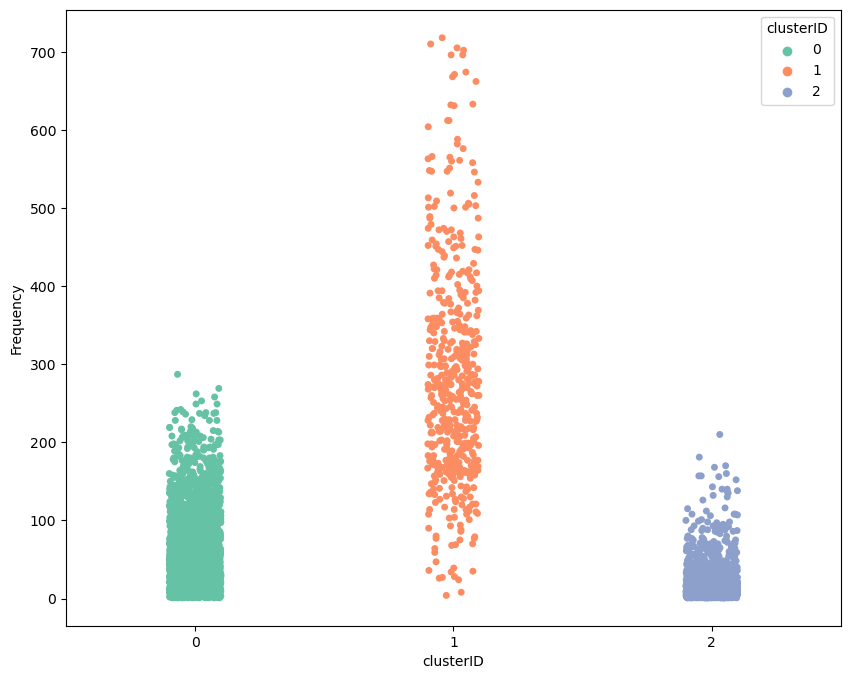

In [69]:
sns.stripplot(x = 'clusterID', y = 'Frequency', hue = "clusterID", palette = "Set2", data=rfm)
plt.savefig("Cluster_IDFrequency.png")